In [7]:
import os 

pastaDados = r"C:\Users\marcos perrude\Documents\ENS410064\dados\trab_final"
listaDados = os.listdir(pastaDados)

# Listando arquivos
print(listaDados)

# Selecionando arquivos do MERRA2
prefixed = [filename for filename in os.listdir(pastaDados) if filename.startswith("MERRA2")]
print(prefixed)

['HAQ_TROPOMI_NO2_GLOBAL_QA75_L3_Monthly_012019_V2.4_20240719.nc4', 'MERRA2_300.inst3_3d_chm_Nv.20080201.nc4']
['MERRA2_300.inst3_3d_chm_Nv.20080201.nc4']


In [8]:
import netCDF4 as nc
dataset= nc.Dataset(pastaDados+ '\\' + prefixed[0])
print(dataset)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Wed Jan 14 12:05:24 2015 GMT
    Comment: GMAO filename: d5124_m2_jan00.inst3_3d_chm_Nv.20080201.nc4
    Filename: MERRA2_300.inst3_3d_chm_Nv.20080201.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2I3NVCHM
    GranuleID: MERRA2_300.inst3_3d_chm_Nv.20080201.nc4
    ProductionDateTime: Original file generated: Wed Jan 14 12:05:24 2015 GMT
    LongName: MERRA2 inst3_3d_chm_Nv: 3d,3-Hourly,Instantaneous,Model-Level,Assimilation,Carbon Monoxide and Ozone Mixing Ratio
    Title: MERRA2 inst3_3d_chm_Nv: 3d,3-Hourly,Instantaneous,Model-Level,Assimilation,Carbon Monoxide and Ozone Mixing Ratio
    Southernmos

In [57]:
dens = dataset['AIRDENS'][:,71,:,:]
print(dens.shape) #(time , lev, .lat, lon)

(8, 361, 576)


35.0
-55.0


C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_52380\4007747770.py:16: RuntimeWarning: invalid value encountered in cast
  ax[2].plot(dataset['time'][:],dens[:,0,250,100])
C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_52380\4007747770.py:16: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  ax[2].plot(dataset['time'][:],dens[:,0,250,100])


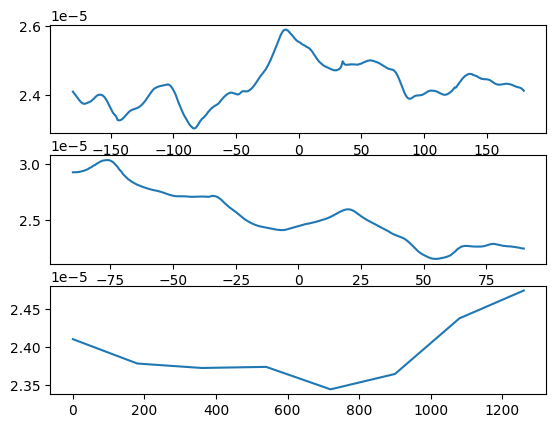

In [23]:

# Plotando o dado 1D 
import matplotlib.pyplot as plt

fig,ax = plt.subplots(3)

# Para o tempo - time = 0 em p = 0 em y=250
ax[0].plot(dataset['lon'][:],dens[0,0,250,:])
print(dataset['lat'][250])

# Para o tempo - time = 0 em p= 0 x = 200
ax[1].plot(dataset['lat'][:],dens[0,0,:,200])
print(dataset['lon'][200])


# Para todo o tempo em um ponto específico
ax[2].plot(dataset['time'][:],dens[:,0,250,100])

In [27]:

os.chdir(pastaDados)
import xarray as xr
xds = xr.open_mfdataset(prefixed)  
xds

<xarray.Dataset> Size: 2GB
Dimensions:  (lon: 576, lat: 361, lev: 72, time: 8)
Coordinates:
  * lon      (lon) float64 5kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float64 576B 1.0 2.0 3.0 4.0 5.0 ... 68.0 69.0 70.0 71.0 72.0
  * time     (time) datetime64[ns] 64B 2008-02-01 ... 2008-02-01T21:00:00
Data variables:
    AIRDENS  (time, lev, lat, lon) float32 479MB dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    CO       (time, lev, lat, lon) float32 479MB dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    DELP     (time, lev, lat, lon) float32 479MB dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    O3       (time, lev, lat, lon) float32 479MB dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    PS       (time, lat, lon) float32 7MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
Attributes: (12/30)
    History:                           Original file generated: Wed Jan 14 12...
    Comment:                           GMAO filename: d5124_m2_jan00.inst3_3d...
    Filename:                          MERRA2_300.inst3_3d_chm_Nv.20080201.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/HO9OVZWF3KW2
    RangeBeginningDate:                2008-02-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2008-02-01
    RangeEndingTime:                   21:00:00.000000

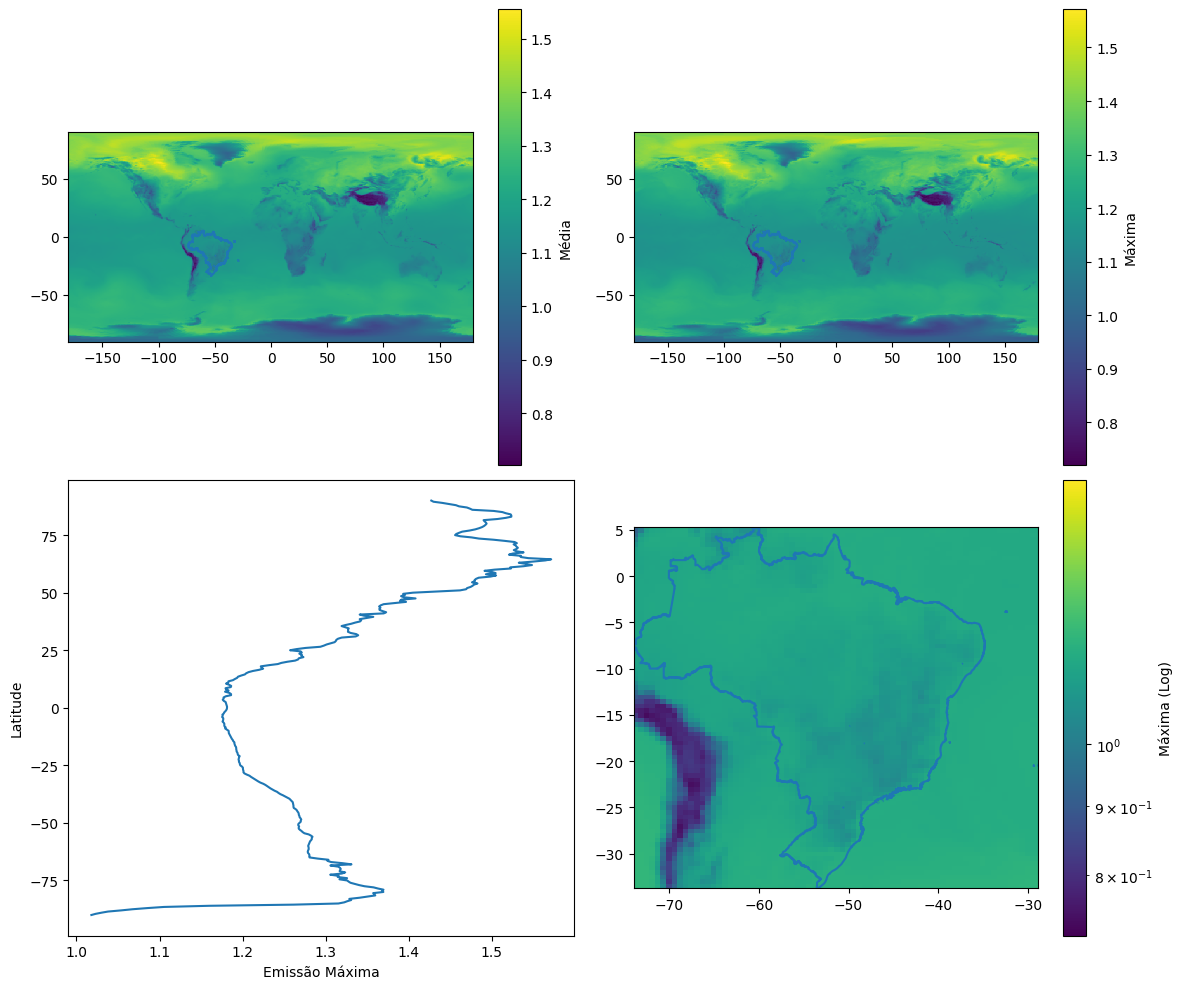

In [58]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib

# Carregar o arquivo shapefile
br = gpd.read_file(r"C:\Users\marcos perrude\Documents\ENS410064\dados\BR_Pais_2022 (1)\BR_Pais_2022.shp")

# Configurar a figura com 2 linhas e 2 colunas
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Média do dia em todos os locais
c1 = ax[0, 0].pcolor(dataset['lon'][:], dataset['lat'], np.mean(dens, axis=0))
br.boundary.plot(ax=ax[0, 0])
fig.colorbar(c1, ax=ax[0, 0], orientation='vertical', label='Média')

# Máxima do dia em todos os locais
c2 = ax[0, 1].pcolor(dataset['lon'][:], dataset['lat'], np.max(dens, axis=0))
br.boundary.plot(ax=ax[0, 1])
fig.colorbar(c2, ax=ax[0, 1], orientation='vertical', label='Máxima')

# Zoom no Brasil
c3 = ax[1, 1].pcolor(dataset['lon'][:], dataset['lat'], np.max(dens, axis=0), norm=matplotlib.colors.LogNorm())
br.boundary.plot(ax=ax[1, 1])
fig.colorbar(c3, ax=ax[1, 1], orientation='vertical', label='Máxima (Log)')

# Configuração de limites do mapa no Brasil
ax[1, 1].set_xlim([br.bounds.minx[0], br.bounds.maxx[0]])
ax[1, 1].set_ylim([br.bounds.miny[0], br.bounds.maxy[0]])

# Máxima emissão em todas as latitudes
ax[1, 0].plot(np.max(np.max(dens[:, :, :], axis=0), axis=1), dataset['lat'][:])
ax[1, 0].set_xlabel('Emissão Máxima')
ax[1, 0].set_ylabel('Latitude')

plt.tight_layout()
plt.show()



TypeError: 'Frozen' object is not callable